In [1]:
# Sun_Analytical_Test
# Authors: Stephan Meighen-Berger
# Testing ground for the analytical calculation

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [114]:
# Input values
# Primary flux
e_grid = np.logspace(0., 10., 101)
primary_flux_norm = 1.
gamma = 2.
primary_flux = primary_flux_norm * e_grid**(-gamma)
# Interaction lengths
interaction_length_p = 1.
interaction_length_pi = 0.5
# Z kernels
Z_pp = 0.5
Z_ppi = 0.75
Z_pipi = 0.25
# Beta functions
beta_pi = 1. / 1000.
beta_mu = 1. / 2000.
# Lambdas
Lambda_p = interaction_length_p / (1. - Z_pp)
Lambda_pi = interaction_length_pi / (1. - Z_pipi)
# Energy transfer constants
a_mu = 0.9
a_nu = 0.5
# Lazy constants
c_pi_int = (primary_flux_norm * 
    Z_ppi / (1. - Z_pp) *
    Lambda_pi / (Lambda_p - Lambda_pi)
)
print("C_pi_int: %.2f" %(c_pi_int))
c_pi_dec = (
    Z_ppi / interaction_length_p
)
print("C_pi_dec: %.2f" %(c_pi_dec))

C_pi_int: 0.75
C_pi_dec: 0.75


In [115]:
# Analytical flux equations
def dphidX_dec(X, phi, E):
    """ Differential equation for the pi decay assumption

    Parameters
    ----------
    X : float
        The cascade depth
    phi : float
        The current flux
    E : float
        The energy of interest

    Returns
    -------
    float
        The resulting differential flux value
    """
    loss = -phi / (X * E * beta_mu)
    gain = (
        c_pi_dec * (E/a_mu)**(-(gamma)) * primary_flux_norm * E**(-(gamma)) *
        (np.exp(-X/Lambda_p))
    )
    return np.nan_to_num(loss + gain)

In [116]:
# Analytical solution
def phi_mu_dec(X, E):
    """ Analytical solution for the pi decay assumption

    Parameters
    ----------
    X : float
        The cascade depth
    E : np.array
        The energy of interest

    Returns
    -------
    np.array
        The resulting differential flux value
    """
    prefac = (
        c_pi_dec * beta_mu * a_mu**(gamma) * primary_flux_norm * E**(-gamma)
    )
    var = X * np.exp(-X/Lambda_p) * E**(-gamma + 1.)
    return prefac * var

In [180]:
# Solving
particle_energy = 1e5
x_points = np.linspace(0., 100., 101)
res_dec = odeint(dphidX_dec, 0., x_points, args=(particle_energy, ), tfirst=True, rtol=1e-13, atol=1e-17)
# sol_int = odeint(dphidX_int, 0., x_points, args=(1e4, ), tfirst=True)

C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [181]:
std_fig_size = 6.
std_fontsize = 20.
std_lw = 3.
std_hlength = 2.

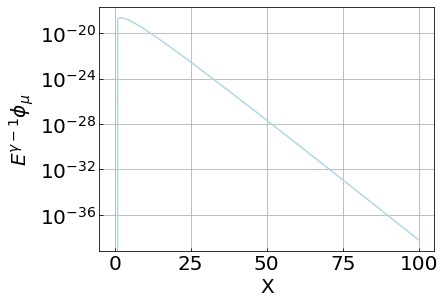

In [184]:
fig, ax = plt.subplots(figsize=(std_fig_size, std_fig_size * 6. / 8.))
# ax.plot(x_points, res_dec[:, 0], color='b')
ax.plot(x_points, phi_mu_dec(x_points, particle_energy), color='lightblue')
ax.tick_params(axis = 'both', which = 'major', labelsize=std_fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=std_fontsize, direction='in')
ax.set_xlabel(r'X', fontsize=std_fontsize)
ax.set_ylabel(r'$E^{\gamma - 1} \phi_\mu$', fontsize=std_fontsize)
ax.set_xscale('linear')
ax.set_yscale('log')
plt.grid(True)
plt.show()

C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


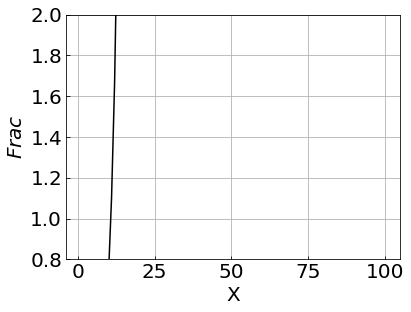

In [183]:
fig, ax = plt.subplots(figsize=(std_fig_size, std_fig_size * 6. / 8.))
ax.plot(x_points, res_dec[:, 0] / phi_mu_dec(x_points, particle_energy), color='k')
ax.tick_params(axis = 'both', which = 'major', labelsize=std_fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=std_fontsize, direction='in')
ax.set_xlabel(r'X', fontsize=std_fontsize)
ax.set_ylabel(r'$Frac$', fontsize=std_fontsize)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_ylim(0.8, 2.)
plt.grid(True)
plt.show()